In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Reading File

In [2]:
data=pd.read_csv('fifa21_trainning.csv')    # import csv file
data.head()                                 # show first 5 rows

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [3]:
data.shape

(13700, 102)

## 2.Data Cleaning

### 2.1.Dropping Duplicates

In [4]:
data = data.drop_duplicates()  #dropping duplicates
data.shape

(13700, 102)

### 2.2. Droping columns

We decided to drop Unnamed and ID since they are just player identifiers.
Afterwards we dropped all general information of a player which don't relate to the OVA. (Name, Club, Nationality, Team & Contract, Joined, Release Clause, Contract)
Loan Date End we dropped as well since it relates to the Contract and it has 94% Null Values.
Then we dropped all columns relating to the position rating since they directly relate to the OVA on the BP of a player.


In [5]:
data = data.drop(['Unnamed: 0', 'ID', 'Name', 'Club', 'Nationality', 'Team & Contract', 'Joined'], axis=1)
data = data.drop(['Release Clause', 'Contract', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF'], axis=1)
data = data.drop(['RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM'],axis=1)
data = data.drop(['RCM','RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB'],axis=1)
data = data.drop(['LCB', 'CB', 'RCB', 'RB', 'GK', 'Hits', 'Loan Date End'], axis=1)



### 2.3. Standardizing Headers

In [6]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   # lower and replace
data.columns

Index(['age', 'bp', 'position', 'height', 'weight', 'foot', 'growth', 'value',
       'wage', 'attacking', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'skill', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'ova'],
      dtype='object')

In [7]:
data.head()

,age,bp,position,height,weight,foot,growth,value,wage,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,CM CDM,"5'9""",161lbs,Right,1,€525K,€4K,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,64
1,30,ST,ST LW LM,"6'0""",159lbs,Right,0,€8.5M,€23K,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,77
2,33,CAM,CAM CF,"5'4""",134lbs,Right,0,€9M,€49K,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,80
3,22,CDM,CDM CM,"5'10""",152lbs,Right,13,€275K,€4K,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,23,CDM,CDM CM,"5'11""",150lbs,Right,8,€725K,€2K,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,65


### 2.4 Data Description

In [8]:
data.dtypes

age                   int64
bp                   object
position             object
height               object
weight               object
foot                 object
growth                int64
value                object
wage                 object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control          int64
movement              int64
acceleration          int64
sprint_speed          int64
agility             float64
reactions             int64
balance             float64
power                 int64
shot_power            int64
jumping             float64
stamina               int64
strength              int64
long_shots            int64
mentality             int64
aggression            int64
interceptions       

In [9]:
data.describe(include='all')

,age,bp,position,height,weight,foot,growth,value,wage,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,ova
count,13700.000000,13700,13357,13700,13700,13700,13700.000000,13700,13700,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,13656.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13693.000000,13693.000000,13656.000000,13700.000000,13371.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700,13700,13633,13633,13700,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
unique,NaN,15,583,21,55,2,NaN,210,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,3,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,CB,CB,"6'0""",154lbs,Right,NaN,€1.1M,€2K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 ★,2★,Medium,Medium,1 ★,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2553,1595,2053,1073,10322,NaN,398,1915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8436,6004,8808,9814,12118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25.286058,NaN,NaN,NaN,NaN,NaN,5.509927,NaN,NaN,258.313431,51.585766,47.996934,53.460292,60.427956,44.986965,266.382993,57.784964,49.576377,44.389124,54.205620,60.586131,322.597007,65.410365,65.429051,64.578134,62.912117,64.682484,302.159343,59.747810,65.067223,63.222190,65.215328,49.115766,261.734891,56.938686,46.901848,52.397868,55.463459,50.261898,59.920051,140.876934,47.042774,48.094818,45.886716,78.039343,15.685620,15.561825,15.548175,15.597956,15.830292,1630.103942,361.317007,NaN,NaN,NaN,NaN,NaN,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219,66.945912
std,4.944498,NaN,NaN,NaN,NaN,NaN,5.797176,NaN,NaN,72.412379,17.899930,19.411530,17.010578,13.975634,17.760924,77.062358,18.097397,18.213576,17.541672,14.893823,15.946896,55.200803,14.715545,14.482221,14.455742,9.015661,14.106680,49.586804,13.453344,11.973828,15.365887,12.727425,19.085820,63.144215,17.075547,20.813064,19.120347,13.704294,15.740524,11.756363,61.588754,20.190705,21.479614,21.194014,81.789044,16.960759,16.260312,16.086613,16.524135,17.276491,260.986045,40.258414,NaN,NaN,NaN,NaN,NaN,11.183342,13.839958,10.159851,9.816203,16.815110,9.736964,6.860189
min,16.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,133.000000,12.000000,22.000000,11.000000,20.000000,4.000000,55.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,6.000000,6.000000,12.000000,1.000000,2.000000,1.000000,2.000000,1.000000,731.000000,228.000000,NaN,NaN,NaN,NaN,NaN,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,38.000000
25%,21.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,231.000000,41.000000,33.000000,45.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.00

In [10]:
data.isna().sum()     # missing values

age                   0
bp                    0
position            343
height                0
weight                0
foot                  0
growth                0
value                 0
wage                  0
attacking             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys              44
skill                 0
dribbling             0
curve                44
fk_accuracy           0
long_passing          0
ball_control          0
movement              0
acceleration          0
sprint_speed          0
agility              44
reactions             0
balance              44
power                 0
shot_power            0
jumping              44
stamina               0
strength              0
long_shots            0
mentality             0
aggression            0
interceptions         7
positioning           7
vision               44
penalties             0
composure           329
defending             0
marking         

In [11]:
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column


age                 0.00
bp                  0.00
position            2.50
height              0.00
weight              0.00
foot                0.00
growth              0.00
value               0.00
wage                0.00
attacking           0.00
crossing            0.00
finishing           0.00
heading_accuracy    0.00
short_passing       0.00
volleys             0.32
skill               0.00
dribbling           0.00
curve               0.32
fk_accuracy         0.00
long_passing        0.00
ball_control        0.00
movement            0.00
acceleration        0.00
sprint_speed        0.00
agility             0.32
reactions           0.00
balance             0.32
power               0.00
shot_power          0.00
jumping             0.32
stamina             0.00
strength            0.00
long_shots          0.00
mentality           0.00
aggression          0.00
interceptions       0.05
positioning         0.05
vision              0.32
penalties           0.00
composure           2.40


In [12]:
cat_cols= data.select_dtypes(np.object).columns

print('Categorical Features:', len(cat_cols))
print('----------')
for c in cat_cols:
    print('Name: {}'.format(data[c].name))    # column name
    print('Type: {}'.format(data[c].dtype))   # column type
    print('Unique values: {}'.format(len(data[c].unique())))   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 12
----------
Name: bp
Type: object
Unique values: 15
['CM' 'ST' 'CAM' 'CDM' 'LM' 'RB' 'CB' 'RM' 'GK' 'LB' 'RW' 'LWB' 'LW' 'RWB'
 'CF']
CB     18.635036
ST     15.671533
CAM    13.109489
GK      9.350365
RM      8.284672
CDM     7.211679
CM      5.715328
LB      5.372263
RB      5.262774
LM      4.795620
RW      1.963504
LWB     1.452555
RWB     1.430657
LW      1.248175
CF      0.496350
Name: bp, dtype: float64

----------
Name: position
Type: object
Unique values: 584
['CM CDM' 'ST LW LM' 'CAM CF' 'CDM CM' 'LM LW RW' 'RB LB' 'CAM' 'CDM CB'
 'LB CB' 'CB' 'LW' 'RB CDM' 'RB' 'ST CAM' 'GK' nan 'ST LM' 'ST' 'CAM CM'
 'LB' 'LW RW' 'LM RM LWB' 'RM' 'LM' 'LB CDM' 'LB RB' 'LB LWB LM' 'CM'
 'RM LM CM' 'ST LW' 'RM LM RW' 'LB CB RB' 'RM CAM' 'CAM RW' 'CDM' 'RB CB'
 'LM RM' 'LB LM' 'CB LB' 'CAM RM' 'RM LM' 'LWB CM' 'CAM CF ST' 'LB LWB'
 'RB RM' 'ST CF' 'ST LW RW' 'CM CDM LB' 'CF CAM' 'RB RWB RM' 'ST RM'
 'CAM RW LW' 'CM CAM' 'CAM LM ST' 'CAM LM RM' 'CM CDM CAM' 'CB RB'
 'RM 

 '€53.5M' '€37M']
€1.1M     2.905109
€0        2.656934
€325K     2.029197
€450K     2.007299
€1M       1.970803
€1.2M     1.846715
€275K     1.839416
€350K     1.729927
€650K     1.722628
€475K     1.722628
€550K     1.722628
€525K     1.693431
€375K     1.605839
€1.3M     1.591241
€300K     1.576642
€400K     1.547445
€425K     1.525547
€575K     1.474453
€625K     1.408759
€500K     1.372263
€675K     1.364964
€800K     1.350365
€750K     1.350365
€5.5M     1.343066
€1.4M     1.306569
€900K     1.284672
€600K     1.233577
€6.5M     1.116788
€250K     1.102190
€925K     1.094891
€1.8M     1.094891
€775K     1.065693
€1.5M     1.065693
€725K     1.036496
€8M       0.970803
€875K     0.963504
€160K     0.948905
€950K     0.934307
€850K     0.912409
€7M       0.875912
€130K     0.875912
€700K     0.861314
€2M       0.854015
€6M       0.846715
€1.6M     0.839416
€8.5M     0.832117
€825K     0.824818
€1.9M     0.817518
€170K     0.817518
€2.4M     0.788321
€7.5M     0.781022
€200K     0.7

Name: sm, dtype: float64

----------
Name: a/w
Type: object
Unique values: 4
['High' 'Medium' 'Low' nan]
Medium    64.607937
High      30.389496
Low        5.002567
Name: a/w, dtype: float64

----------
Name: d/w
Type: object
Unique values: 4
['Medium' 'Low' 'High' nan]
Medium    71.987090
High      17.310937
Low       10.701973
Name: d/w, dtype: float64

----------
Name: ir
Type: object
Unique values: 5
['1 ★' '2 ★' '3 ★' '5 ★' '4 ★']
1 ★    88.452555
2 ★     8.620438
3 ★     2.474453
4 ★     0.401460
5 ★     0.051095
Name: ir, dtype: float64

----------


### 2.5. Additional Dropping of columns/rows

Since the number of Null values (see above) is realtively small compared to the whole sample size we decided to drop all rows with NaN values.

In [13]:
data = data.dropna() # dropping alll rows with NaN

In [14]:
data = data.reset_index(drop=True) # resetting index

In [15]:
data.shape

(13137, 64)

In [16]:
data.head()

,age,bp,position,height,weight,foot,growth,value,wage,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,CM CDM,"5'9""",161lbs,Right,1,€525K,€4K,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,64
1,30,ST,ST LW LM,"6'0""",159lbs,Right,0,€8.5M,€23K,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,77
2,33,CAM,CAM CF,"5'4""",134lbs,Right,0,€9M,€49K,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,80
3,22,CDM,CDM CM,"5'10""",152lbs,Right,13,€275K,€4K,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,23,CDM,CDM CM,"5'11""",150lbs,Right,8,€725K,€2K,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,65


Reasoning why we dropped columns:

Group body values(height, weight, foot) - They are all just given parameters of a player which shouldnt relate to the OVA.

Position - Since BP is always included in Position, we decided to drop Position because it has 500+ unique values and BP has only 15.

Wage - We assumed that there is a direct correlation between wage and value. Therefore we dropped wage.

Attribute Ratings - By looking at the data in excel we saw that all attribute ratings are categorized in the following groups (Goalkeeping, Defending, Mentality, Power, Movement, Skill, Attacking). These groups have the sum values of their respective attributes. Therefore we decided to just keep the Groups and drop all individual attribute ratings.


In [17]:
data = data.drop(['position','height', 'foot', 'weight', 'wage', 'crossing','finishing', 'heading_accuracy', 'short_passing', 'volleys'], axis = 1)
data = data.drop(['dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions','balance', 'shot_power','jumping', 'stamina','strength','long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking','gk_positioning', 'gk_reflexes'], axis = 1)

In [18]:
data.shape

(13137, 25)

In [19]:
data.head()

,age,bp,growth,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,1,€525K,258,286,346,306,290,148,48,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,64
1,30,ST,0,€8.5M,365,375,404,372,313,77,55,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,77
2,33,CAM,0,€9M,336,424,424,308,332,80,21,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,80
3,22,CDM,13,€275K,242,259,282,277,257,168,42,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,59
4,23,CDM,8,€725K,249,280,324,280,294,185,52,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,65


### 2.6. Cleaning/Transforming of columns

#### 2.6.1 w/f sm ir columns

In [20]:
data['w/f'] = data['w/f'].str.replace('★','')
data['sm'] = data['sm'].str.replace('★','')
data['ir'] = data['ir'].str.replace('★','')
# replacing the star in the wf ir and sm column

In [21]:
data.head()

,age,bp,growth,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,1,€525K,258,286,346,306,290,148,48,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,64
1,30,ST,0,€8.5M,365,375,404,372,313,77,55,1961,412,3,4,High,Low,2,83,75,68,82,33,71,77
2,33,CAM,0,€9M,336,424,424,308,332,80,21,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,80
3,22,CDM,13,€275K,242,259,282,277,257,168,42,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,59
4,23,CDM,8,€725K,249,280,324,280,294,185,52,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,65


In [22]:
data[["w/f", "sm", "ir"]] = data[["w/f", "sm", 'ir']].apply(pd.to_numeric)
#making the wf ir and sm column numeric

In [23]:
data.head()

,age,bp,growth,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,1,€525K,258,286,346,306,290,148,48,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,64
1,30,ST,0,€8.5M,365,375,404,372,313,77,55,1961,412,3,4,High,Low,2,83,75,68,82,33,71,77
2,33,CAM,0,€9M,336,424,424,308,332,80,21,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,80
3,22,CDM,13,€275K,242,259,282,277,257,168,42,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,59
4,23,CDM,8,€725K,249,280,324,280,294,185,52,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,65


In [24]:
data.dtypes

age             int64
bp             object
growth          int64
value          object
attacking       int64
skill           int64
movement        int64
power           int64
mentality       int64
defending       int64
goalkeeping     int64
total_stats     int64
base_stats      int64
w/f             int64
sm              int64
a/w            object
d/w            object
ir              int64
pac             int64
sho             int64
pas             int64
dri             int64
def             int64
phy             int64
ova             int64
dtype: object

#### 2.6.2. a/w d/w columns

In [25]:
data['a/w/d'] = data['a/w'] + data['d/w'] #concatenating the aw and dw column

In [26]:
data.head()

,age,bp,growth,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,ova,a/w/d
0,26,CM,1,€525K,258,286,346,306,290,148,48,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,64,HighMedium
1,30,ST,0,€8.5M,365,375,404,372,313,77,55,1961,412,3,4,High,Low,2,83,75,68,82,33,71,77,HighLow
2,33,CAM,0,€9M,336,424,424,308,332,80,21,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,80,HighMedium
3,22,CDM,13,€275K,242,259,282,277,257,168,42,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,59,MediumMedium
4,23,CDM,8,€725K,249,280,324,280,294,185,52,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,65,LowMedium


In [27]:
data = data.drop(['a/w', 'd/w'], axis = 1) #dropping the columns which we just replaced

In [28]:
data.shape

(13137, 24)

#### 2.6.3 Value column

In [29]:
data.value = [x.strip('€') for x in data.value] #transforming the value column by stripping the € sign

In [30]:
data['value'] = data['value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval) 
#replacing the K and  M in the value column by multiplying it with a thousand/million

In [31]:
data.head()

,age,bp,growth,value,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ova,a/w/d
0,26,CM,1,525000.0,258,286,346,306,290,148,48,1682,357,4,2,1,69,51,63,63,51,60,64,HighMedium
1,30,ST,0,8500000.0,365,375,404,372,313,77,55,1961,412,3,4,2,83,75,68,82,33,71,77,HighLow
2,33,CAM,0,9000000.0,336,424,424,308,332,80,21,1925,404,4,4,2,80,77,78,86,27,56,80,HighMedium
3,22,CDM,13,275000.0,242,259,282,277,257,168,42,1527,329,2,2,1,57,44,54,57,57,60,59,MediumMedium
4,23,CDM,8,725000.0,249,280,324,280,294,185,52,1664,360,2,3,1,66,44,60,64,60,66,65,LowMedium


## 3. Data Analysing

In [32]:
numerical = data._get_numeric_data() # define a dataframe for all numericals

### 3.1. Correlation Matrix

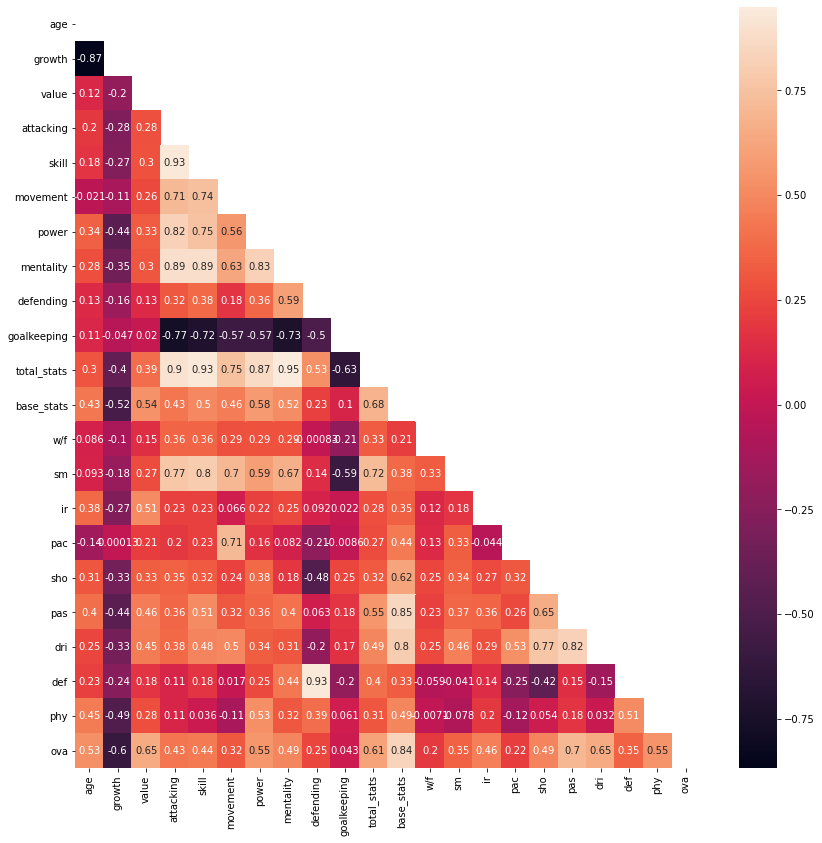

In [33]:
correlations_matrix = numerical.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()
# showing the correlation matrix to analyze the multicollinearity

Since defending and def as well age and growth have a high correlation we decided to drop defending and age.

In [34]:
data = data.drop(['defending','age'],axis=1)

### 3.2. Plotting of graphs for numericals

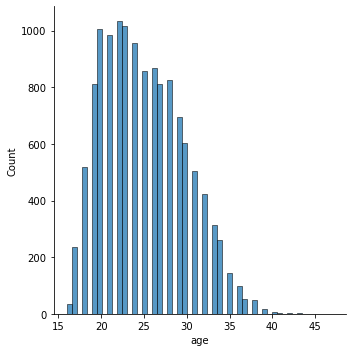

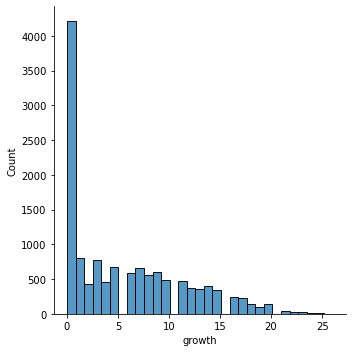

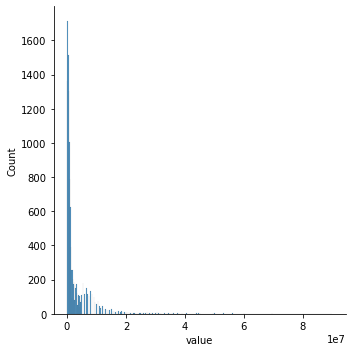

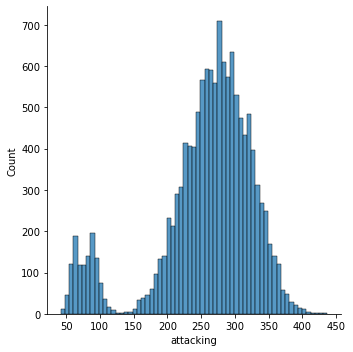

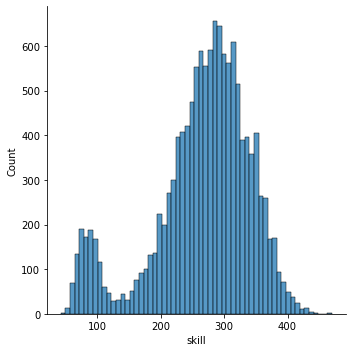

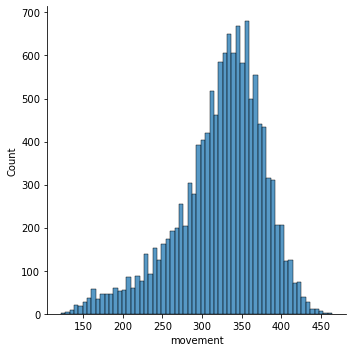

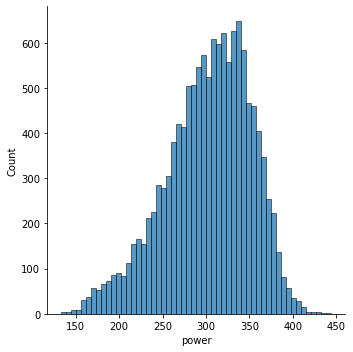

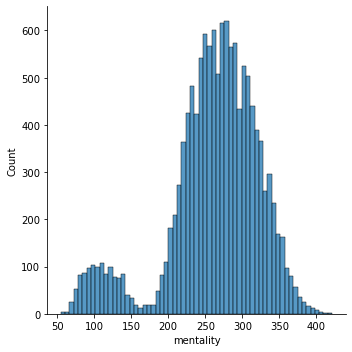

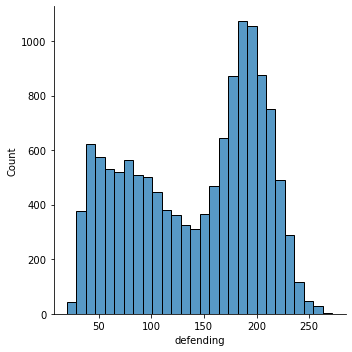

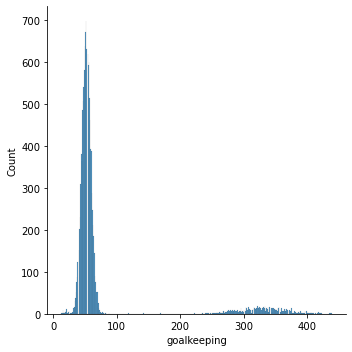

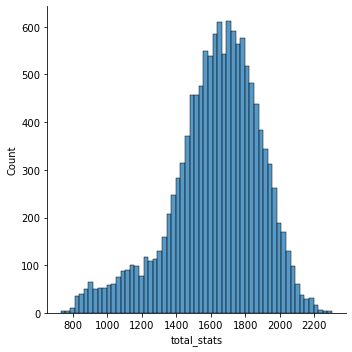

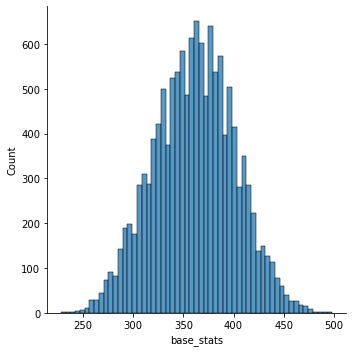

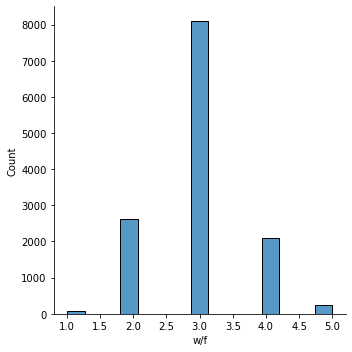

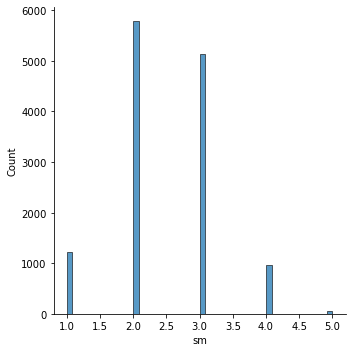

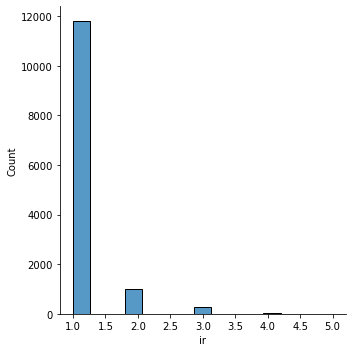

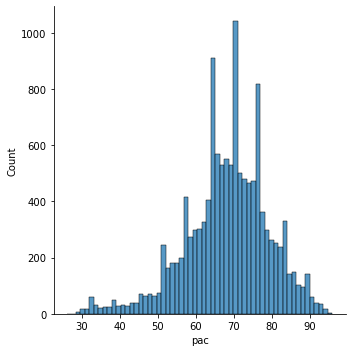

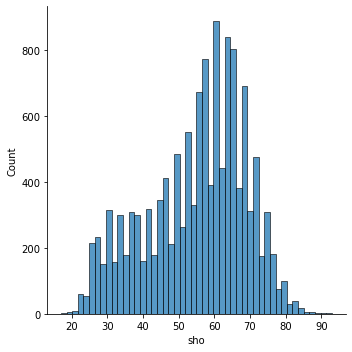

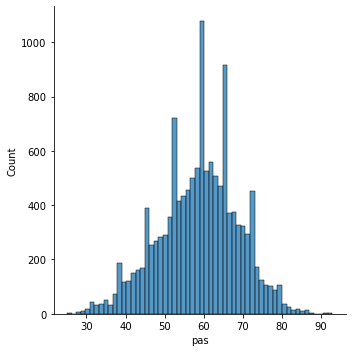

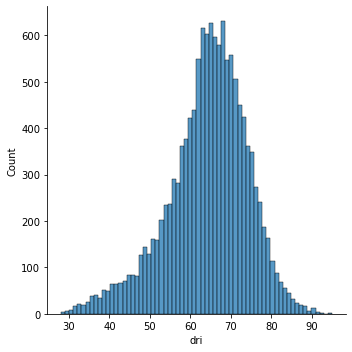

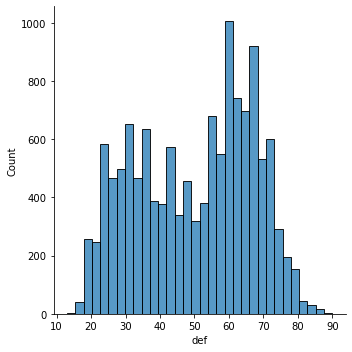

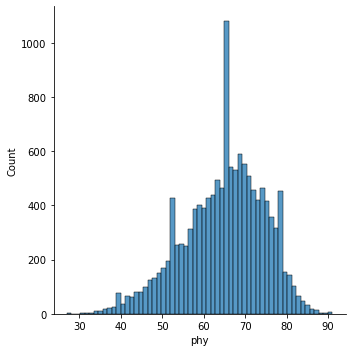

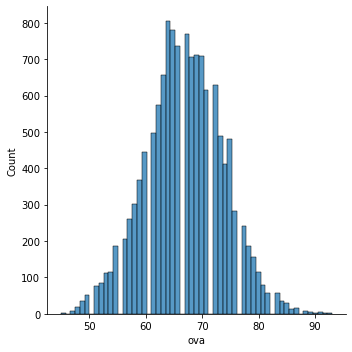

In [35]:
for x in numerical.columns:
    sns.displot(numerical[x])
plt.show()

### 3.3. Transformation of specific columns

After looking at the graps we decided to try a transformation for the following columns:
Attacking, skill, movement, power, mentality and def. We each looked performed a log transormation or boxcox on the data and decided as a team which one is plausible.

In [36]:
def log_transfom_clean_(x):   #Defining the log transform function
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

In [37]:
mentality_log = list(map(log_transfom_clean_, data['mentality']))

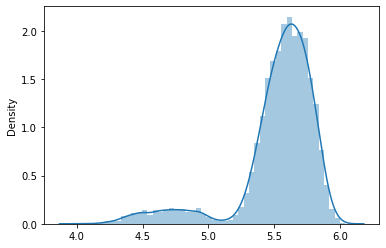

In [38]:
sns.distplot(mentality_log)
plt.show()

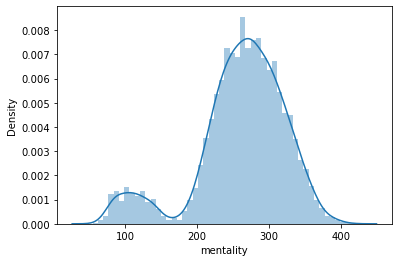

In [39]:
sns.distplot(data['mentality']) # based on the graph we decided to keep the original data
plt.show()

In [40]:
data['def_log'] = list(map(log_transfom_clean_, data['def'])) 
#After looking at the graps we decide to use the transformed values

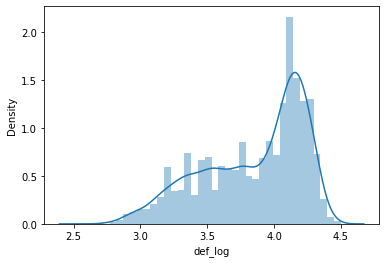

In [41]:
sns.distplot(data['def_log'])
plt.show()

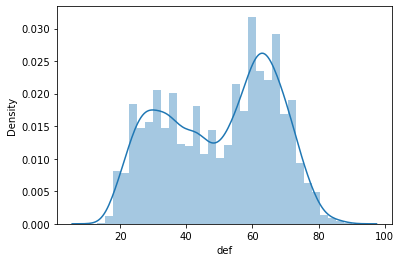

In [42]:
sns.distplot(data['def'])
plt.show()

In [43]:
data = data.drop(['def'],axis=1) #drop the orignal colum of def

In [44]:
from scipy import stats
xt_pow, lmbda = stats.boxcox(data['power'])
#boxcox transformation on power

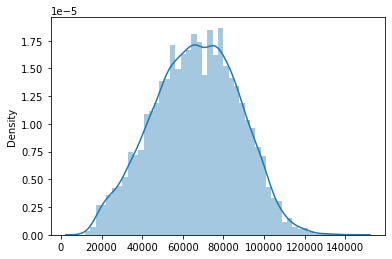

In [45]:
sns.distplot(xt_pow)
plt.show()

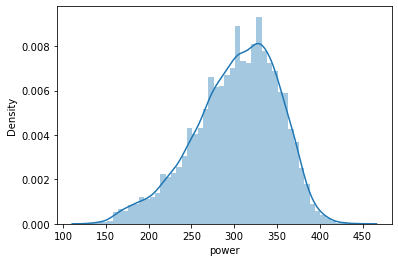

In [46]:
sns.distplot(data['power'])
plt.show()

In [47]:
data['xt_pow'] = pd.DataFrame(xt_pow) 
#After looking at the graphs we decided to use the tranformed values

In [48]:
data = data.drop(['power'], axis = 1) #Drop original data

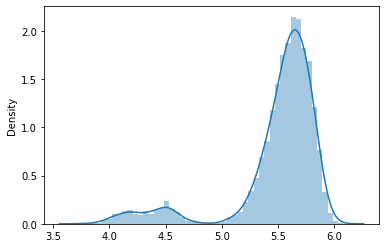

In [49]:
Attacking_log = list(map(log_transfom_clean_, data['attacking'])) 
sns.distplot(Attacking_log)
plt.show()
#log transformation for attacking

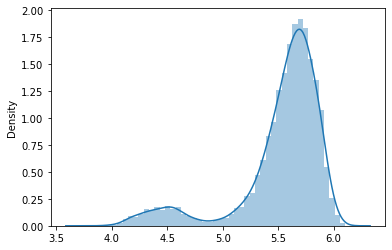

In [50]:
Skill_log = list(map(log_transfom_clean_, data['skill']))
sns.distplot(Skill_log)
plt.show()
#log transformation for skill

In [51]:
data['skill_log'] = list(map(log_transfom_clean_, data['skill']))
data['attacking_log'] = list(map(log_transfom_clean_, data['attacking']))
#After looking at the graphs we decided to use both transformed values and add them to the dataframe

In [52]:
data = data.drop(['skill','attacking'], axis = 1) #Dropping original values

In [53]:
data.shape

(13137, 22)

### 3.4. Standardizing data

In [54]:
numerical = data._get_numeric_data()

In [55]:
Y = data['ova']
numerical = numerical.drop(['ova'], axis=1)
# Dropping the target value ova form the numerical dataset and defining it as Y

In [56]:
numerical.head()

,growth,value,movement,mentality,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,phy,def_log,xt_pow,skill_log,attacking_log
0,1,525000.0,346,290,48,1682,357,4,2,1,69,51,63,63,60,3.931826,66214.617943,5.655992,5.552960
1,0,8500000.0,404,313,55,1961,412,3,4,2,83,75,68,82,71,3.496508,99132.955768,5.926926,5.899897
2,0,9000000.0,424,332,21,1925,404,4,4,2,80,77,78,86,56,3.295837,67111.966233,6.049733,5.817111
3,13,275000.0,282,257,42,1527,329,2,2,1,57,44,54,57,60,4.043051,53901.982083,5.556828,5.488938
4,8,725000.0,324,294,52,1664,360,2,3,1,66,44,60,64,66,4.094345,55115.191112,5.634790,5.517453


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
num_cols = numerical.select_dtypes(np.number).columns

In [59]:
for c in num_cols:   
    numerical[c]=StandardScaler().fit_transform(numerical[c].values.reshape(-1, 1))
#Normalize all numerical values

In [60]:
numerical.head()

,growth,value,movement,mentality,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,phy,def_log,xt_pow,skill_log,attacking_log
0,-0.802674,-0.389049,0.408822,0.460118,-0.364730,0.201891,-0.101382,1.508112,-0.587501,-0.306888,0.057553,-0.280208,0.416709,-0.123277,-0.493222,0.223693,-0.009688,0.341593,0.155060
1,-0.974662,1.091827,1.468604,0.826470,-0.278674,1.273318,1.261475,0.026060,1.991182,2.049390,1.331015,1.453090,0.910842,1.812449,0.634817,-0.917291,1.557477,1.031945,1.013199
2,-0.974662,1.184672,1.834046,1.129108,-0.696660,1.135069,1.063241,1.508112,1.991182,2.049390,1.058130,1.597531,1.899108,2.219971,-0.903418,-1.443256,0.033033,1.344863,0.808430
3,1.261177,-0.435471,-0.760592,-0.065518,-0.438492,-0.393347,-0.795200,-1.455992,-0.587501,-0.306888,-1.033986,-0.785753,-0.472731,-0.734559,-0.493222,0.515219,-0.595864,0.088919,-0.003296
4,0.401239,-0.351911,0.006836,0.523831,-0.315555,0.132766,-0.027045,-1.455992,0.701841,-0.306888,-0.215332,-0.785753,0.120229,-0.021397,0.122072,0.649661,-0.538106,0.287569,0.067236


In [61]:
numerical.shape

(13137, 19)

### 3.5. Encoding

In [62]:
categorical = data.select_dtypes(include=[np.object]) #defining categorical columns

In [63]:
categorical.head()

,bp,a/w/d
0,CM,HighMedium
1,ST,HighLow
2,CAM,HighMedium
3,CDM,MediumMedium
4,CDM,LowMedium


In [64]:
cat_cols= data.select_dtypes(np.object).columns

In [65]:
one_hot_data=pd.get_dummies(data[cat_cols], drop_first=True)
#one hot encoding categorical values

In [66]:
one_hot_data.shape

(13137, 22)

In [67]:
one_hot_data.head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,a/w/d_HighLow,a/w/d_HighMedium,a/w/d_LowHigh,a/w/d_LowLow,a/w/d_LowMedium,a/w/d_MediumHigh,a/w/d_MediumLow,a/w/d_MediumMedium
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [68]:
data_b = pd.concat([numerical, one_hot_data], axis=1)
#concatenating numericals and encoded categoricals into new dataframe

In [69]:
data_b.shape

(13137, 41)

## 4. Regression Model

In [70]:
X = data_b
Y = data['ova']
#Defining the X,Y value

In [71]:
X.head()

,growth,value,movement,mentality,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,phy,def_log,xt_pow,skill_log,attacking_log,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,a/w/d_HighLow,a/w/d_HighMedium,a/w/d_LowHigh,a/w/d_LowLow,a/w/d_LowMedium,a/w/d_MediumHigh,a/w/d_MediumLow,a/w/d_MediumMedium
0,-0.802674,-0.389049,0.408822,0.460118,-0.364730,0.201891,-0.101382,1.508112,-0.587501,-0.306888,0.057553,-0.280208,0.416709,-0.123277,-0.493222,0.223693,-0.009688,0.341593,0.155060,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-0.974662,1.091827,1.468604,0.826470,-0.278674,1.273318,1.261475,0.026060,1.991182,2.049390,1.331015,1.453090,0.910842,1.812449,0.634817,-0.917291,1.557477,1.031945,1.013199,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,-0.974662,1.184672,1.834046,1.129108,-0.696660,1.135069,1.063241,1.508112,1.991182,2.049390,1.058130,1.597531,1.899108,2.219971,-0.903418,-1.443256,0.033033,1.344863,0.808430,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1.261177,-0.435471,-0.760592,-0.065518,-0.438492,-0.393347,-0.795200,-1.455992,-0.587501,-0.306888,-1.033986,-0.785753,-0.472731,-0.734559,-0.493222,0.515219,-0.595864,0.088919,-0.003296,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.401239,-0.351911,0.006836,0.523831,-0.315555,0.132766,-0.027045,-1.455992,0.701841,-0.306888,-0.215332,-0.785753,0.120229,-0.021397,0.122072,0.649661,-0.538106,0.287569,0.067236,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [72]:
Y.head()

0    64
1    77
2    80
3    59
4    65
Name: ova, dtype: int64

### 4.1. X/Y split

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=100)


### 4.2. Linear Model

In [74]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()    # model
lm.fit(X_train, y_train)   # model train
predictions=lm.predict(X_test)  

### 4.3. R2_score, RMSE, ADJ_R2

In [75]:
from sklearn.metrics import r2_score, mean_squared_error

In [76]:
rmse = mean_squared_error(y_test, predictions)**0.5
# rmse = math.sqrt(mse)
print(rmse)

2.2896256503971406


In [77]:
r2 = r2_score(y_test, predictions)
r2

0.8879546186754086

In [78]:
X_test.shape

(2628, 41)

In [79]:
n = len(X_test) 
p = X_test.shape[1]

In [80]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.886178183782018